Project 1 - Space Weather Reporting
Collaborators: Bennett Von Ancken, Diego Lopez, and Sawyer Byrd

Imports for libraries to be used in this project.

In [492]:
#html
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By 
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

#data
import pandas as pd

import numpy as np

import datetime

import re

import matplotlib.pyplot as plt

Part 1: Data Scraping and Preparation

Use selenium webdriver to get the URL.

In [493]:
try:
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html")
    html = driver.page_source
    driver.quit()
except HTTPError as e:
    print(e)

Extract the text from the page. Then use BeautifulSoup to read and parse the data, either as html or lxml.

In [494]:
soup = BeautifulSoup(html, 'html.parser')

Use prettify( ) to view the content and find the appropriate table.

In [495]:
print(soup.prettify())

<html data-bs-theme="light" lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content=

Use find to save table as a variable.

In [496]:
table = soup.find('table')

Use pandas to read in the HTML file into a dataframe.

In [497]:
df = pd.read_html(str(table), header=0, flavor='lxml')[0]
columns = ['Rank', 'X_Class', 'Date', 'Region', 'Start', 'Maximum', 'Stop', 'View_archive'] #column names could be added for the empty ones but idk what the x40+ even means
df.columns = columns
df

/tmp/ipykernel_3670/3310757143.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table), header=0, flavor='lxml')[0]


,Rank,X_Class,Date,Region,Start,Maximum,Stop,View_archive
0,1,X40+,2003/11/04,486,19:29,19:53,20:06,View archive
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,View archive
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24,View archive
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03,View archive
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,View archive
5,6,X14.36,2003/10/29,486,20:37,20:49,21:01,View archive
6,7,X13.37,2017/09/06,2673,11:53,12:02,12:10,View archive
7,8,X12.97,1997/11/06,8100,11:49,11:55,12:01,View archive
8,9,X12.95,2006/12/05,930,10:18,10:35,10:45,View archive
9,10,X11.96,2003/11/02,486,17:03,17:25,17:39,View archive


Step - Tidy up the top 50 solar flare data

Drop the last columnn of the dataframe

In [498]:
df = df[df.columns[:-1]]
df

,Rank,X_Class,Date,Region,Start,Maximum,Stop
0,1,X40+,2003/11/04,486,19:29,19:53,20:06
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55
5,6,X14.36,2003/10/29,486,20:37,20:49,21:01
6,7,X13.37,2017/09/06,2673,11:53,12:02,12:10
7,8,X12.97,1997/11/06,8100,11:49,11:55,12:01
8,9,X12.95,2006/12/05,930,10:18,10:35,10:45
9,10,X11.96,2003/11/02,486,17:03,17:25,17:39


Use datetime import to combine the date and each of the three time columns into three datetime columns

In [499]:
for index, row in df.iterrows():
    df['Start_DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Start'])
    df['Max_DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Maximum'])
    df['Stop_DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Stop'])

df.drop(['Date', 'Start', 'Maximum', 'Stop'], axis=1, inplace=True)

df = df[['Rank', 'X_Class', 'Start_DateTime', 'Max_DateTime', 'Stop_DateTime']]
df

,Rank,X_Class,Start_DateTime,Max_DateTime,Stop_DateTime
0,1,X40+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X14.36,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X13.37,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
7,8,X12.97,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,9,X12.95,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X11.96,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


Replace any '-' with NaN

In [500]:
df.replace('-', np.nan)

,Rank,X_Class,Start_DateTime,Max_DateTime,Stop_DateTime
0,1,X40+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X14.36,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X13.37,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
7,8,X12.97,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,9,X12.95,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X11.96,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


Step 3 - Scrape the NASA data

Use BeautifulSoup functions and string functions to obtain each row of data as a long string. 

In [501]:
try:
    driver2 = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver2.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html")
    html2 = driver2.page_source
    driver2.quit()
except HTTPError as e:
    print(e)

soup2 = BeautifulSoup(html2, 'html.parser')

soup2.prettify()

pre_text = soup2.find('pre').get_text()
pattern = re.compile(r'\d{4}/\d{2}/\d{2}.*')
rows = pattern.findall(pre_text)


data = []

for row in rows:
    row_data = re.split(r'\s+', row.strip())
    data.append({
        'Start_date': row_data[0],
        'Start_time': row_data[1],
        'End_date': row_data[2],
        'End_time': row_data[3],
        'Start_frq': row_data[4],
        'End_frq': row_data[5],
        'Flare_loc': row_data[6],
        'Flare_rgn': row_data[7],
        'Flare_cls': row_data[8],
        'CME_date': row_data[9],
        'CME_time': row_data[10],
        'CME_CPA': row_data[11],
        'CME_Width': row_data[12],
        'CME_Speed': row_data[13],
        'Plots': row_data[14],
        

    })

df2 = pd.DataFrame(data)

print(df2)

     Start_date Start_time End_date End_time Start_frq End_frq Flare_loc  \
0    1996/05/15      05:45    05/15    06:34     10000     500    ------   
1    1997/01/20      08:56    01/20    09:02     14000   12000    ------   
2    1997/04/01      14:00    04/01    14:15      8000    4000    S25E16   
3    1997/04/07      14:30    04/07    17:30     11000    1000    S28E19   
4    1997/05/12      05:15    05/14    16:00     12000      80    N21W08   
..          ...        ...      ...      ...       ...     ...       ...   
600  2023/05/05      08:04    05/05    08:50     14000    1300    N14E32   
601  2023/05/07      22:57    05/08    00:10     14000     600    N16W06   
602  2023/05/09      18:51    05/09    20:20     16000    1250    N13W31   
603  2023/06/17      10:37    06/17    10:42     14000    5500    S22E85   
604  2023/06/20      17:54    06/10    18:30     14000    2000    S17E73   

    Flare_rgn Flare_cls CME_date CME_time CME_CPA CME_Width CME_Speed Plots  
0       -

Step 4 - Tidy the NASA Table

Recode any missing entries as NaN.

In [502]:
def replace_with_nan(value):
    if isinstance(value, str) and value.startswith('-') and value.endswith('-'):
        return np.nan
    return value

df2 = df2.applymap(replace_with_nan)
print(df2)

     Start_date Start_time End_date End_time Start_frq End_frq Flare_loc  \
0    1996/05/15      05:45    05/15    06:34     10000     500       NaN   
1    1997/01/20      08:56    01/20    09:02     14000   12000       NaN   
2    1997/04/01      14:00    04/01    14:15      8000    4000    S25E16   
3    1997/04/07      14:30    04/07    17:30     11000    1000    S28E19   
4    1997/05/12      05:15    05/14    16:00     12000      80    N21W08   
..          ...        ...      ...      ...       ...     ...       ...   
600  2023/05/05      08:04    05/05    08:50     14000    1300    N14E32   
601  2023/05/07      22:57    05/08    00:10     14000     600    N16W06   
602  2023/05/09      18:51    05/09    20:20     16000    1250    N13W31   
603  2023/06/17      10:37    06/17    10:42     14000    5500    S22E85   
604  2023/06/20      17:54    06/10    18:30     14000    2000    S17E73   

    Flare_rgn Flare_cls CME_date CME_time CME_CPA CME_Width CME_Speed Plots  
0        

/tmp/ipykernel_3670/3131156800.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(replace_with_nan)


Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as NA.

In [503]:
df2['Halo'] = df2['CME_CPA'].apply(lambda x: True if x == 'Halo' else False)

df2['CME_CPA'] = df2['CME_CPA'].replace('Halo', np.nan)
print(df2)

     Start_date Start_time End_date End_time Start_frq End_frq Flare_loc  \
0    1996/05/15      05:45    05/15    06:34     10000     500       NaN   
1    1997/01/20      08:56    01/20    09:02     14000   12000       NaN   
2    1997/04/01      14:00    04/01    14:15      8000    4000    S25E16   
3    1997/04/07      14:30    04/07    17:30     11000    1000    S28E19   
4    1997/05/12      05:15    05/14    16:00     12000      80    N21W08   
..          ...        ...      ...      ...       ...     ...       ...   
600  2023/05/05      08:04    05/05    08:50     14000    1300    N14E32   
601  2023/05/07      22:57    05/08    00:10     14000     600    N16W06   
602  2023/05/09      18:51    05/09    20:20     16000    1250    N13W31   
603  2023/06/17      10:37    06/17    10:42     14000    5500    S22E85   
604  2023/06/20      17:54    06/10    18:30     14000    2000    S17E73   

    Flare_rgn Flare_cls CME_date CME_time CME_CPA CME_Width CME_Speed Plots  \
0       

The width column indicates if the given value is a lower bound. Create a new column that indicates if width is given as a lower bound, and remove any non-numeric part of the width column.

In [504]:
df2['lower_bound'] = df2['CME_Width'].astype(str).str.startswith('>')
df2['CME_Width'] = df2['CME_Width'].astype(str).str.replace('>', '')
print(df2)

     Start_date Start_time End_date End_time Start_frq End_frq Flare_loc  \
0    1996/05/15      05:45    05/15    06:34     10000     500       NaN   
1    1997/01/20      08:56    01/20    09:02     14000   12000       NaN   
2    1997/04/01      14:00    04/01    14:15      8000    4000    S25E16   
3    1997/04/07      14:30    04/07    17:30     11000    1000    S28E19   
4    1997/05/12      05:15    05/14    16:00     12000      80    N21W08   
..          ...        ...      ...      ...       ...     ...       ...   
600  2023/05/05      08:04    05/05    08:50     14000    1300    N14E32   
601  2023/05/07      22:57    05/08    00:10     14000     600    N16W06   
602  2023/05/09      18:51    05/09    20:20     16000    1250    N13W31   
603  2023/06/17      10:37    06/17    10:42     14000    5500    S22E85   
604  2023/06/20      17:54    06/10    18:30     14000    2000    S17E73   

    Flare_rgn Flare_cls CME_date CME_time CME_CPA CME_Width CME_Speed Plots  \
0       

Combine date and time columns for start, end and cme so they can be encoded as datetime objects.

In [505]:
df2['End_time'] = df2['End_time'].replace({'24:00': '00:00'})

df2['Start_datetime'] = pd.to_datetime(df2['Start_date'] + ' ' + df2['Start_time'], format='%Y/%m/%d %H:%M')
df2['End_datetime'] = pd.to_datetime(df2['End_date'] + ' ' + df2['End_time'], format='%m/%d %H:%M')
df2['CME_datetime'] = pd.to_datetime(df2['CME_date'] + ' ' + df2['CME_time'], format='%m/%d %H:%M')

df2['Year'] = df2['Start_datetime'].dt.year

df2['End_datetime'] = pd.to_datetime(df2['Year'].astype(str) + '/' + df2['End_datetime'].dt.strftime('%m/%d %H:%M'))
df2['CME_datetime'] = pd.to_datetime(df2['Year'].astype(str) + '/' + df2['CME_datetime'].dt.strftime('%m/%d %H:%M'))

df2.drop(columns=['Year'], inplace=True)

df2.drop(columns=['Start_date', 'Start_time', 'End_date', 'End_time', 'CME_date', 'CME_time'], inplace=True)

df2 = df2[['Start_datetime', 'End_datetime', 'Start_frq', 'End_frq', 'Flare_loc', 'Flare_rgn', 'Flare_cls', 'CME_datetime', 'CME_CPA', 'CME_Width', 'CME_Speed', 'Plots', 'Halo', 'lower_bound']]

print(df2)

         Start_datetime        End_datetime Start_frq End_frq Flare_loc  \
0   1996-05-15 05:45:00 1996-05-15 06:34:00     10000     500       NaN   
1   1997-01-20 08:56:00 1997-01-20 09:02:00     14000   12000       NaN   
2   1997-04-01 14:00:00 1997-04-01 14:15:00      8000    4000    S25E16   
3   1997-04-07 14:30:00 1997-04-07 17:30:00     11000    1000    S28E19   
4   1997-05-12 05:15:00 1997-05-14 16:00:00     12000      80    N21W08   
..                  ...                 ...       ...     ...       ...   
600 2023-05-05 08:04:00 2023-05-05 08:50:00     14000    1300    N14E32   
601 2023-05-07 22:57:00 2023-05-08 00:10:00     14000     600    N16W06   
602 2023-05-09 18:51:00 2023-05-09 20:20:00     16000    1250    N13W31   
603 2023-06-17 10:37:00 2023-06-17 10:42:00     14000    5500    S22E85   
604 2023-06-20 17:54:00 2023-06-10 18:30:00     14000    2000    S17E73   

    Flare_rgn Flare_cls        CME_datetime CME_CPA CME_Width CME_Speed Plots  \
0         NaN     

Step 2 - Analysis

Question 1.
Can you replicate the top 50 solar flare table in SpaceWeatherLive.comLinks to an external site. exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

In [506]:
flare_order = {
    'X': 5,
    'M': 4,
    'C': 3,
    'B': 2,
    'A': 1
}

# Extract the flare class and convert it to numerical value based on order
df2['Flare_cls_order'] = df2['Flare_cls'].str.extract(r'([A-Z])')
df2['Flare_cls_order'] = df2['Flare_cls_order'].map(flare_order)

df2['Flare_cls_numeric'] = df2['Flare_cls'].str.extract(r'(\d+\.?\d*)').astype(float)


df2 = df2.sort_values(by=['Flare_cls_order', 'Flare_cls_numeric'], ascending=[False, False])

df2.drop(columns=['Flare_cls_order'], inplace=True)
df2.drop(columns=['Flare_cls_numeric'], inplace=True)

df2['Rank'] = range(1, len(df2) + 1)

cols = df2.columns.tolist()
cols = ['Rank'] + [col for col in cols if col != 'Rank']
df2 = df2[cols]

top_50 = df2.head(50)
print(top_50)


     Rank      Start_datetime        End_datetime Start_frq End_frq Flare_loc  \
251     1 2003-11-04 20:00:00 2003-11-04 00:00:00     10000     200    S19W83   
129     2 2001-04-02 22:05:00 2001-04-03 02:30:00     14000     250    N19W72   
244     3 2003-10-28 11:10:00 2003-10-29 00:00:00     14000      40    S16E08   
138     4 2001-04-15 14:05:00 2001-04-16 13:00:00     14000      40    S20W85   
245     5 2003-10-29 20:55:00 2003-10-29 00:00:00     11000     500    S15W02   
10      6 1997-11-06 12:20:00 1997-11-07 08:30:00     14000     100    S18W63   
525     7 2017-09-06 12:05:00 2017-09-07 08:00:00     16000      70    S08W33   
339     8 2006-12-05 10:50:00 2006-12-05 20:00:00     14000     250    S07E68   
248     9 2003-11-02 17:30:00 2003-11-03 01:00:00     12000     250    S14W56   
526    10 2017-09-10 16:02:00 2017-09-11 06:50:00     16000     150    S09W92   
299    11 2005-01-20 07:15:00 2005-01-20 16:30:00     14000      25    N14W61   
370    12 2011-08-09 08:20:0

The data is pretty close but some solar flares are missing from this data set, but it also has information on solar flares missing from the other dataset.

Question 2.
Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flare

In [507]:
def calculate_similarity(dt1, dt2):
    return abs((dt1 - dt2).total_seconds())

def match_best_row(df1, df2):
    best_match = {}
    for idx1, row1 in df1.iterrows():
        best_similarity = float('inf')
        best_row = None
        for idx2, row2 in df2.iterrows():
            # Compute similarity based on timestamps
            start_similarity = calculate_similarity(row1['Start_DateTime'], row2['Start_datetime'])
            end_similarity = calculate_similarity(row1['Max_DateTime'], row2['End_datetime'])
            # Compute similarity based on X-class values
            x_class_similarity = abs(ord(str(row1['X_Class'])[0]) - ord(str(row2['Flare_cls'])[0]))
            total_similarity = start_similarity + end_similarity + x_class_similarity
            if best_row is None or total_similarity < best_similarity:
                best_similarity = total_similarity
                best_row = row2
        best_match[idx1] = best_row
    return best_match

# Load df1 and df2 (assuming they are already loaded)
# df1 = pd.read_csv('df1.csv')
# df2 = pd.read_csv('df2.csv')

# Call the function to get the best match
best_matches = match_best_row(df, df2)

# Convert the dictionary to a DataFrame
best_matches_df = pd.DataFrame.from_dict(best_matches, orient='index')

print(best_matches_df)

    Rank      Start_datetime        End_datetime Start_frq End_frq Flare_loc  \
0      1 2003-11-04 20:00:00 2003-11-04 00:00:00     10000     200    S19W83   
1      2 2001-04-02 22:05:00 2001-04-03 02:30:00     14000     250    N19W72   
2      3 2003-10-28 11:10:00 2003-10-29 00:00:00     14000      40    S16E08   
3     59 2005-09-07 18:05:00 2005-09-08 00:00:00     12000     200    S11E77   
4      4 2001-04-15 14:05:00 2001-04-16 13:00:00     14000      40    S20W85   
5      5 2003-10-29 20:55:00 2003-10-29 00:00:00     11000     500    S15W02   
6      7 2017-09-06 12:05:00 2017-09-07 08:00:00     16000      70    S08W33   
7      6 1997-11-06 12:20:00 1997-11-07 08:30:00     14000     100    S18W63   
8      8 2006-12-05 10:50:00 2006-12-05 20:00:00     14000     250    S07E68   
9      9 2003-11-02 17:30:00 2003-11-03 01:00:00     12000     250    S14W56   
10    10 2017-09-10 16:02:00 2017-09-11 06:50:00     16000     150    S09W92   
11    11 2005-01-20 07:15:00 2005-01-20 

We used the start and end date times along with the flare classification to find the best fit for each row of the spaceweatherlive data set.

Question 3.
Prepare one plot that shows the top 50 solar flares in context with all data available in the NASA dataset.

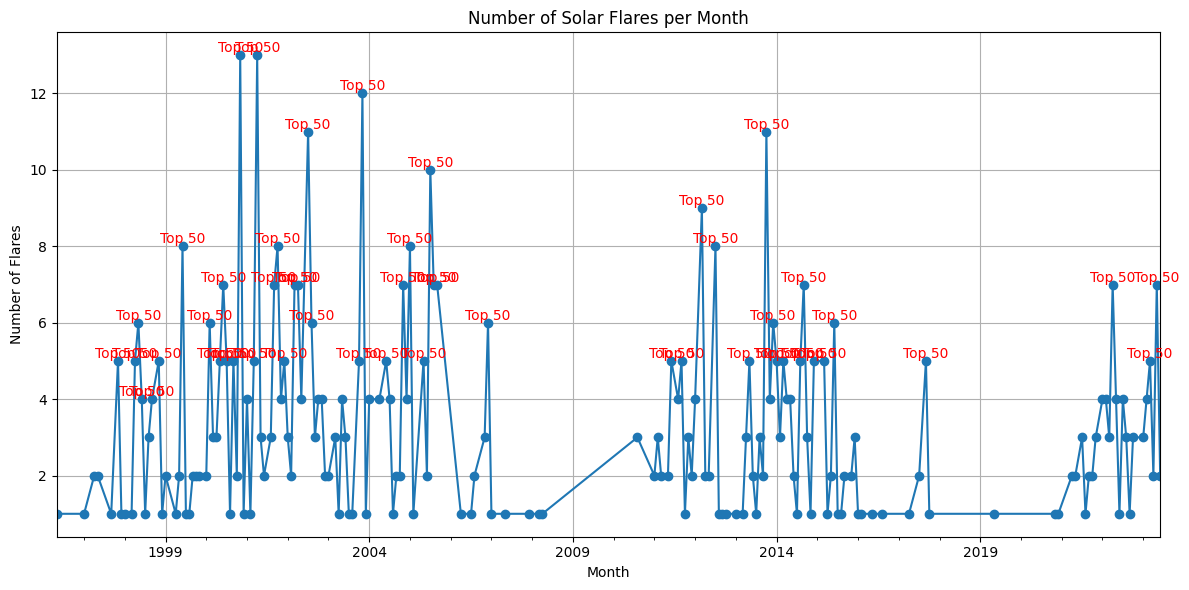

In [515]:
df2['Month'] = df2['Start_datetime'].dt.to_period('M')

# Count the number of flares per month
flares_per_month = df2.groupby('Month').size()

# Identify the top 50 solar flares
top_50_flare_indices = flares_per_month.nlargest(50).index

# Plot the number of flares per month over time
plt.figure(figsize=(12, 6))
flares_per_month.plot(marker='o', linestyle='-')

# Add graphical elements to indicate the occurrence of the top 50 solar flares
for idx, month in enumerate(flares_per_month.index):
    if month in top_50_flare_indices:
        plt.text(month.to_timestamp(), flares_per_month[month], 'Top 50', ha='center', va='bottom', color='red')

plt.title('Number of Solar Flares per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flares')
plt.grid(True)
plt.tight_layout()
plt.show()


This plot shows the number of solar flares that occur each month, with the intent of showing if solar flares cluster in time. The graph shows that this is true as there are points with many solar flares and other points which are recessions in the graph where no solar flares occur. I also represented the indices where top 50 flares are.